<a href="https://colab.research.google.com/github/fawniechau/Homelessness/blob/main/chau_homelessness_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This notebook focuses on utilizing data science methodologies to predict homelessness rates. It explores the intricate relationship between local housing market factors and the prevalence of homelessness. Through data science methodolgies, our goal is to understand the factors that contribute to homelessness and identify the key market predictors that influence these rates. 

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

# Model preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

#Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import RobustScaler

#Train-test splits and cross validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

from scipy.stats import uniform, randint

#Models
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
import statsmodels.api as sm

#Model metrics
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix

#Missing data
import missingno as msno

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

#Train-test splits and cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint
import xgboost as xgb

# Model metrics and analysis
from sklearn.metrics import  mean_squared_error, mean_absolute_error

# plot tree model
import graphviz

## Load clean data

##### $\rightarrow$ Loading the clean data set from Github:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fawniechau/Homelessness/main/clean_homelessness_data-2.csv')

##### $\rightarrow$ Review the contents of the data set.

In [ ]:
df.head()

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,rate_homeless,rate_sheltered,rate_unsheltered,percent_black,percent_latino_hispanic,percent_asian,percent_pacific_islander,percent_population_0_19,percent_population_65_plus,percent_female_population
0,2017,AK-500,1128.0,973.0,155.0,297376,11.743647,2.438863,8.500000,15.334315,...,37.931777,32.719520,5.212257,0.053811,0.089967,0.093952,0.024387,0.269161,0.099140,0.489629
1,2017,AK-501,717.0,578.0,139.0,444146,9.042710,2.249699,14.607715,13.311670,...,16.143340,13.013739,3.129602,0.019530,0.055727,0.040104,0.004593,0.278562,0.109905,0.467752
2,2017,AL-500,1092.0,875.0,217.0,958302,-0.852477,1.862248,19.492331,12.188416,...,11.395155,9.130733,2.264422,0.331147,0.040843,0.016632,0.000311,0.256410,0.149058,0.521677
3,2017,AL-501,606.0,341.0,265.0,622361,-8.507004,1.858394,18.899839,12.539132,...,9.737114,5.479135,4.257979,0.266807,0.033816,0.016889,0.000382,0.254735,0.167126,0.519669
4,2017,AL-502,155.0,133.0,22.0,265264,0.751167,1.362010,18.803186,10.374694,...,5.843235,5.013873,0.829362,0.090348,0.042056,0.004901,0.000471,0.236545,0.190708,0.513937


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   year                                        374 non-null    int64  
 1   coc_number                                  374 non-null    object 
 2   total_homeless                              374 non-null    float64
 3   total_sheltered                             374 non-null    float64
 4   total_unsheltered                           374 non-null    float64
 5   total_population                            374 non-null    int64  
 6   house_price_index_2009                      374 non-null    float64
 7   log_median_rent                             374 non-null    float64
 8   utility_costs                               374 non-null    float64
 9   percentage_owners_cost_burden_2016          374 non-null    float64
 10  percentage_ren

## State your questions

The overall problem is to determine whether and how housing market factors are related to homelessness. To answer this general problem, here are some questions we can follow up with an analysis: 


* How accurately can we predict homelessness rates?
* Is there a difference in homelessness rates based on the type of district like in urban or suburban areas?



## Analysis Preparation


In [ ]:
variable_remove = ["total_sheltered", "total_unsheltered", "total_black", 
                   "total_latino_hispanic", "total_asian", "total_pacific_islander", 
                   "total_population_0_19", "total_population_65_plus", "total_female_population", 
                   "year", "rate_unsheltered", "rate_sheltered"]

In [ ]:
df = df.drop(columns = variable_remove)

In [ ]:
# train test data 
X = df[df.columns.difference(['coc_number', 'rate_homeless', "total_population", "total_homeless"])]
y = df['rate_homeless']

In [ ]:
X.head()

,HUD_unit_occupancy_rate,average_Jan_temperature,average_summer_temperature,census_region,city_or_urban,gini_coefficient_2016,high_housing_density,house_price_index_2009,log_median_rent,medicare_reimbursements_per_enrollee,...,share_built_before_1940,share_no_bachelors,share_overcrowded_units_2016,share_renters_2016,share_under_18_with_single_parent,share_veteran_status,suburban,total_Jan_precipitation,total_annual_precipitation,utility_costs
0,99.000000,13.800000,60.799999,4,1,42.010002,0,11.743647,2.438863,8.751520,...,0.366995,65.634148,4.117406,39.727921,23.379078,14.535126,0,1.710000,16.500000,8.500000
1,99.000000,13.800000,60.799999,4,0,40.675701,0,9.042710,2.249699,9.972870,...,2.236410,75.560379,9.294898,33.922234,19.786558,14.142518,0,1.710000,16.500000,14.607715
2,95.083710,50.995346,80.874313,3,0,47.633533,0,-0.852477,1.862248,9.318163,...,7.191579,65.983711,1.235925,31.769621,32.077599,9.149558,1,6.669876,38.593376,19.492331
3,87.000801,57.893360,81.939949,3,1,46.713249,0,-8.507004,1.858394,8.709522,...,3.681716,74.543457,1.712736,32.109203,33.668129,11.647923,0,12.296666,58.519012,18.899839
4,95.178665,48.382103,79.429985,3,0,45.165546,0,0.751167,1.362010,8.967195,...,5.150007,82.332657,1.539988,27.708206,27.959316,9.135015,0,5.462999,44.778618,18.803186


In [ ]:
X.columns

Index(['HUD_unit_occupancy_rate', 'average_Jan_temperature',
       'average_summer_temperature', 'census_region', 'city_or_urban',
       'gini_coefficient_2016', 'high_housing_density',
       'house_price_index_2009', 'log_median_rent',
       'medicare_reimbursements_per_enrollee', 'migration_4_year_change',
       'net_migration', 'number_eviction', 'percent_asian', 'percent_black',
       'percent_female_population', 'percent_latino_hispanic',
       'percent_pacific_islander', 'percent_population_0_19',
       'percent_population_65_plus', 'percentage_excessive_drinking',
       'percentage_owners_cost_burden_2016',
       'percentage_renters_severe_cost_burden_2016', 'poverty_rate',
       'proportion_one_person_households', 'rate_unemployment',
       'rental_vacancy_rate', 'share_HUD_units', 'share_built_before_1940',
       'share_no_bachelors', 'share_overcrowded_units_2016',
       'share_renters_2016', 'share_under_18_with_single_parent',
       'share_veteran_status', 's

## Scaling the Data Frame

In [ ]:
# define scaler using only training data 
scaler = RobustScaler().fit(X)

In [ ]:
# perform scaling transform on predictors 
X = pd.DataFrame(data=scaler.transform(X), columns=X.columns.values, index=X.index)

## Fitting the Model

In [ ]:
#fit the model
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          rate_homeless   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     13.18
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.46e-46
Time:                        01:57:08   Log-Likelihood:                -1384.7
No. Observations:                 374   AIC:                             2847.
Df Residuals:                     335   BIC:                             3001.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

## Train Test Split

Here we are splitting the data into training and testing sets, keeping 20% of the data for the test set. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)

In [ ]:
# Examining the shape of the training data matrix of predictors
print(X_train.shape, np.round(X_train.shape[0]/X_train.shape[1]))

(299, 38) 8.0


In [ ]:
scaler = RobustScaler().fit(X_train)

In [ ]:
# Performing scaling transformation on the predictors

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#fit the model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          rate_homeless   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     11.02
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           7.47e-36
Time:                        01:57:09   Log-Likelihood:                -1106.9
No. Observations:                 299   AIC:                             2292.
Df Residuals:                     260   BIC:                             2436.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2113      2.150      8.006      0.0

In [ ]:
# Displaying the predictor name and the p-value of the estimated coefficient
variables = X.columns
variables = np.insert(variables, 0, 'intercept')

results = pd.DataFrame(index = variables, 
             data = {'p-value':model.pvalues.values.round(3), 
                     'significant':model.pvalues.values < 0.05,
                     'coefficient':model.params.values.round(2),
                     'abs_coefficient':np.abs(model.params.values.round(2))})

results.sort_values(by = 'abs_coefficient', ascending=False)

,p-value,significant,coefficient,abs_coefficient
intercept,0.000,True,17.21,17.21
log_median_rent,0.007,True,9.54,9.54
proportion_one_person_households,0.004,True,5.45,5.45
census_region,0.000,True,5.33,5.33
share_HUD_units,0.004,True,4.84,4.84
percent_black,0.021,True,-4.41,4.41
share_built_before_1940,0.030,True,4.39,4.39
suburban,0.088,False,-3.96,3.96
share_under_18_with_single_parent,0.197,False,3.58,3.58
poverty_rate,0.231,False,-3.41,3.41


In [ ]:
# Computing the MSE, RMSE, and R^2 values
MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))

print('MSE =', MSE.round(3), ' RMSE =', RMSE.round(3), ' R-squared =', R_squared.round(3))

MSE = 120.159  RMSE = 10.962  R-squared = 0.388


## Lasso Method

Creating an array of possible α values

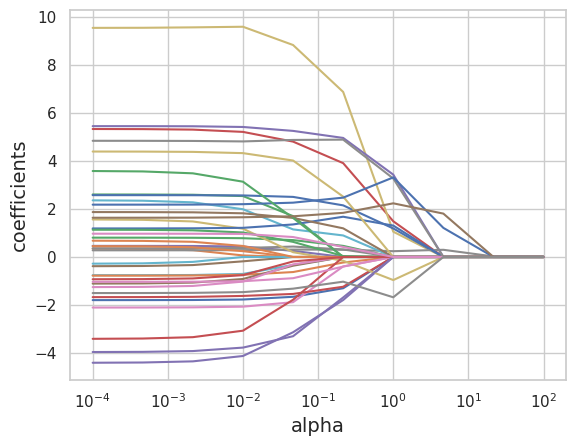

In [ ]:
#fit the model using lasso method
alphas = 10**np.linspace(-4,2,10)

lasso = Lasso(max_iter = 100000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

As the alpha gets bigger, coefficients center on 0. 

Doing 5-fold cross validation to find α

In [ ]:
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.2784264209338742

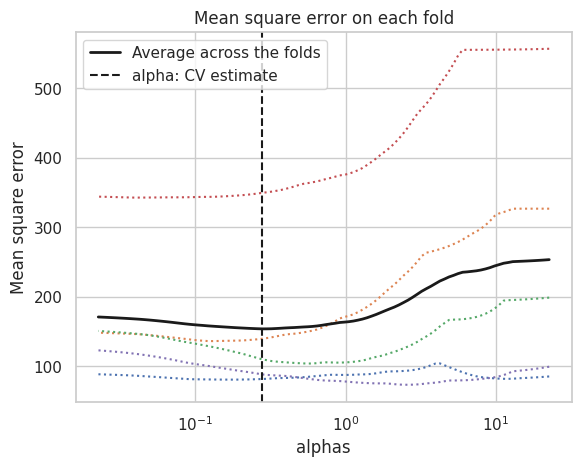

In [ ]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, ":")
plt.plot(
    lassocv.alphas_ ,
    lassocv.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lassocv.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight");
     

Fit the Lasso model on the training data with the best α
 and examine the coefficients.

In [ ]:
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)

In [ ]:
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients.round(2), index = variables, columns = ['Estimated Coefficient'])
     

,Estimated Coefficient
intercept,14.52
HUD_unit_occupancy_rate,-1.21
average_Jan_temperature,0.00
average_summer_temperature,-0.00
census_region,3.67
city_or_urban,0.00
gini_coefficient_2016,0.00
high_housing_density,-0.00
house_price_index_2009,0.20
log_median_rent,6.00


Using the lasso model to predict the test data, we are computing the MSE, RMSE, and R2.

In [ ]:
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))

print('MSE =', MSE_lasso.round(3), ' RMSE =', RMSE_lasso.round(3), ' R-squared =', R_squared_lasso.round(3))

MSE = 107.794  RMSE = 10.382  R-squared = 0.451


Here is the scatter plot of the measured log sale price vs. the predicted log sale price. 

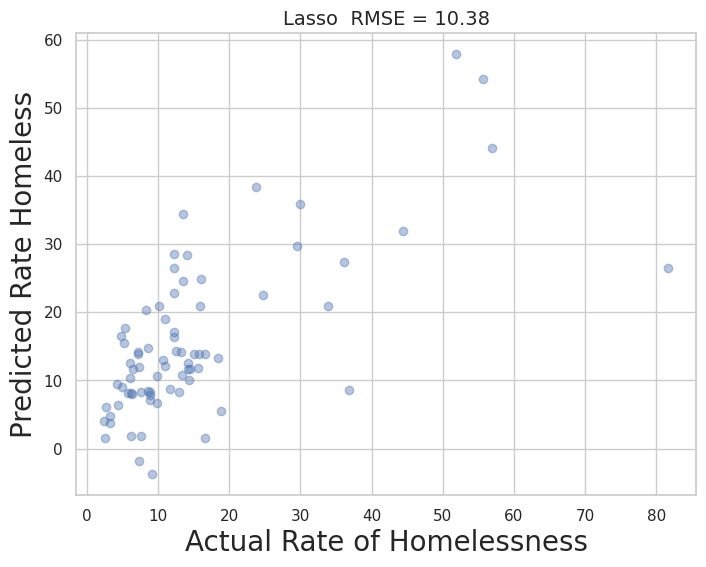

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4)

plt.xlabel('Actual Rate of Homelessness',fontsize = 20)
plt.ylabel('Predicted Rate Homeless',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14);

## Ridge Regression Method 

Creating an array of possible α values

In [ ]:
alphas = 10**np.linspace(-3,5,20)

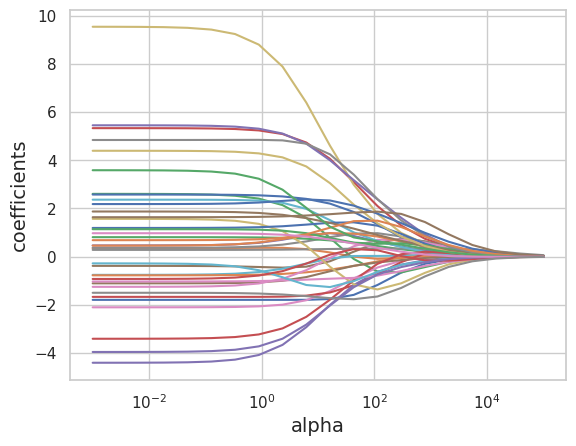

In [ ]:
# Fitting the model using ridge method
ridge = Ridge(max_iter = 100000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

As coefficients increase on the X-axis, it gets smaller and smaller getting close to 0.

Doing 5-fold cross validation again

In [ ]:
ridgecv = RidgeCV(alphas = alphas, cv = 5, scoring = 'neg_mean_squared_error')

ridgecv.fit(X_train, y_train);

In [ ]:
# Printing the best α 
ridgecv.alpha_

42.81332398719396

In [ ]:
# Fitting the ridge regression model on training data
ridge_reg = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [ ]:
coefficients = ridge_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, ridge_reg.intercept_.round(3))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients, index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,13.930
HUD_unit_occupancy_rate,-1.590
average_Jan_temperature,-0.004
average_summer_temperature,-0.099
census_region,3.098
city_or_urban,0.855
gini_coefficient_2016,0.202
high_housing_density,-0.907
house_price_index_2009,0.953
log_median_rent,2.983


Using the lasso model to predict the test data, we are computing the MSE, RMSE, and R2.

In [ ]:
MSE_ridge = mean_squared_error(y_test, ridge_reg.predict(X_test))
RMSE_ridge = np.sqrt(MSE_ridge)
R_squared_ridge = r2_score(y_test, ridge_reg.predict(X_test))

print('MSE =', MSE_ridge.round(3), ' RMSE =', RMSE_ridge.round(3), ' R-squared =', R_squared_ridge.round(3))

MSE = 111.178  RMSE = 10.544  R-squared = 0.434


Text(0.5, 1.0, 'Lasso  RMSE = 10.38')

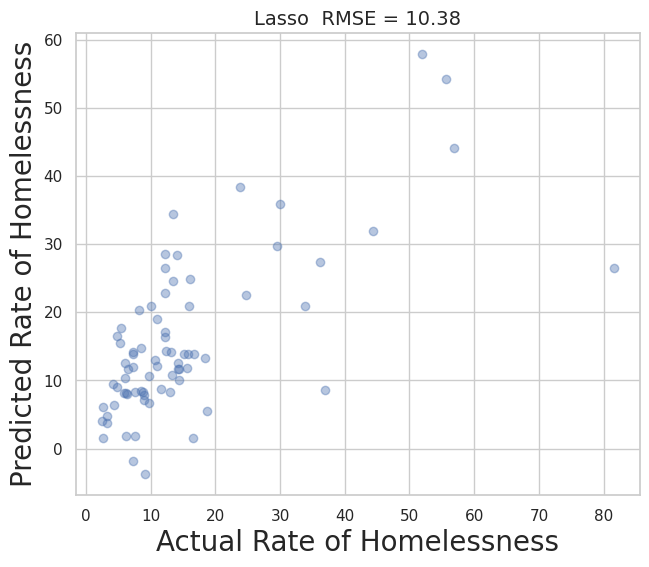

In [ ]:
# making a scatter plot
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4)
plt.xlabel('Actual Rate of Homelessness',fontsize = 20)
plt.ylabel('Predicted Rate of Homelessness',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14)

## XGBoost Method

XGBoost → eXtreme Gradient Boosting
We are going to be using cross-validation to find the best parameters for our XG boost model. 

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True, scoring = 'neg_mean_squared_error')

search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f287ccd2800>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f287ccd0df0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f287ccd0c10>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f287ccd06a0>},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
# Creating an XGBoost model with the best parameters
model_xgb = xgb.XGBRegressor(objective="reg:squarederror")

In [ ]:
model_xgb.set_params(**search.best_params_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8823639748749138, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3215254130700145, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.15508742868227365, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=101, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Fitting model on training data 
model_xgb = xgb.XGBRegressor()  
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Predict the test data 
y_pred_xgb = model_xgb.predict(X_test)

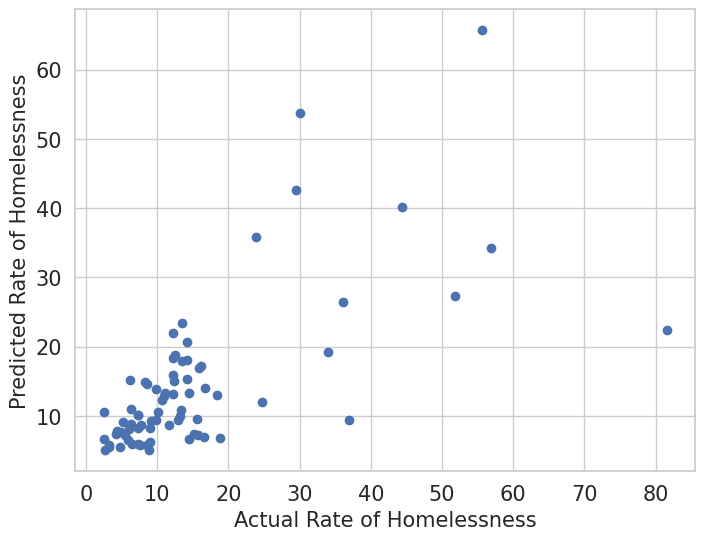

In [ ]:
# Plotting test values 
plt.figure(figsize = (8,6))

plt.plot(y_test, y_pred_xgb, 'o');

plt.xlabel('Actual Rate of Homelessness', fontsize = 15)
plt.ylabel('Predicted Rate of Homelessness', fontsize = 15)

plt.tick_params(labelsize = 15)

In [ ]:
# Computing the RMSE
mean_squared_error(y_test, y_pred_xgb, squared = False).round(3)

10.46

In [ ]:
# Computing the mean absolute error
mean_absolute_error(y_test, y_pred_xgb).round(3)

6.222

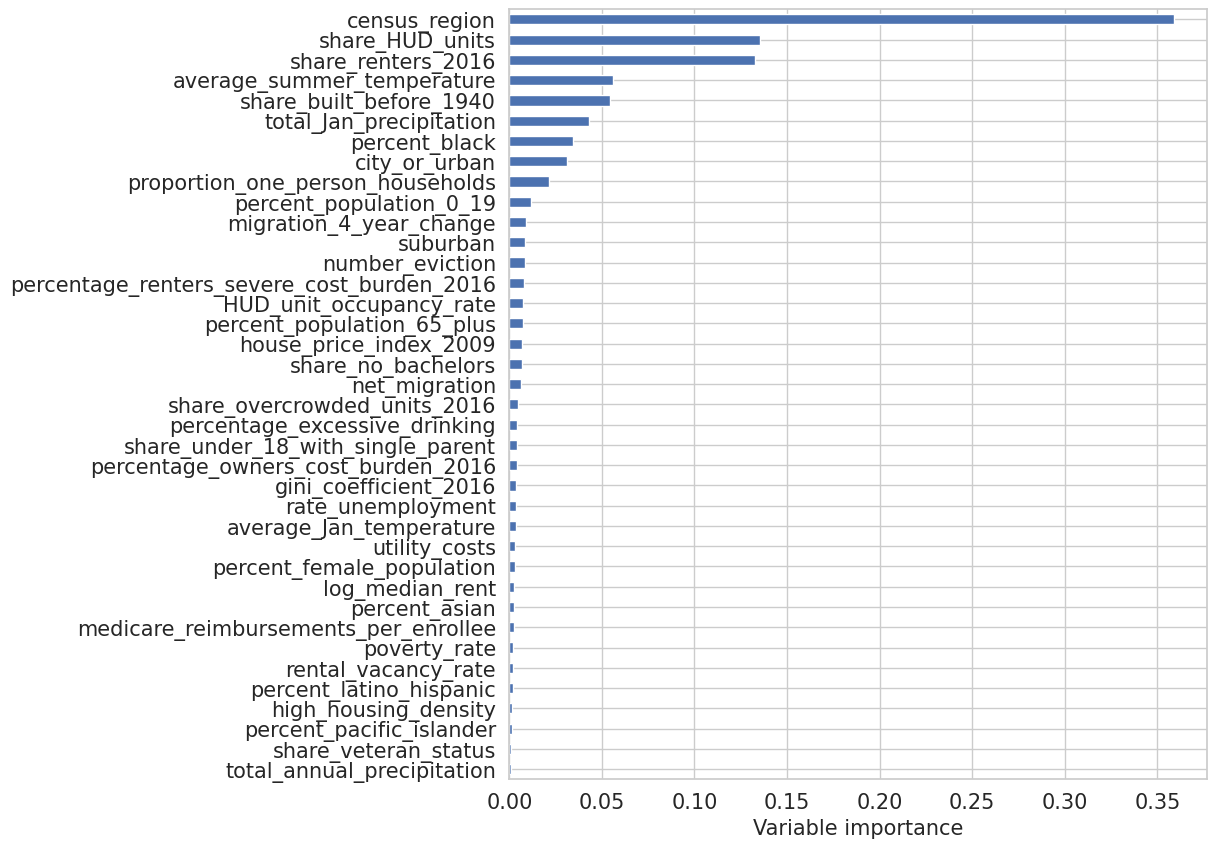

In [ ]:
# Plotting variable importances for the XGBoost model
(pd.DataFrame(dict(cols=X.columns, imp=model_xgb.feature_importances_)).
 sort_values(by = 'imp').
 plot('cols', 'imp', 'barh', legend = False, figsize = (9,10)))

plt.ylabel('')
plt.xlabel('Variable importance', fontsize = 15)

plt.tick_params(labelsize = 15);

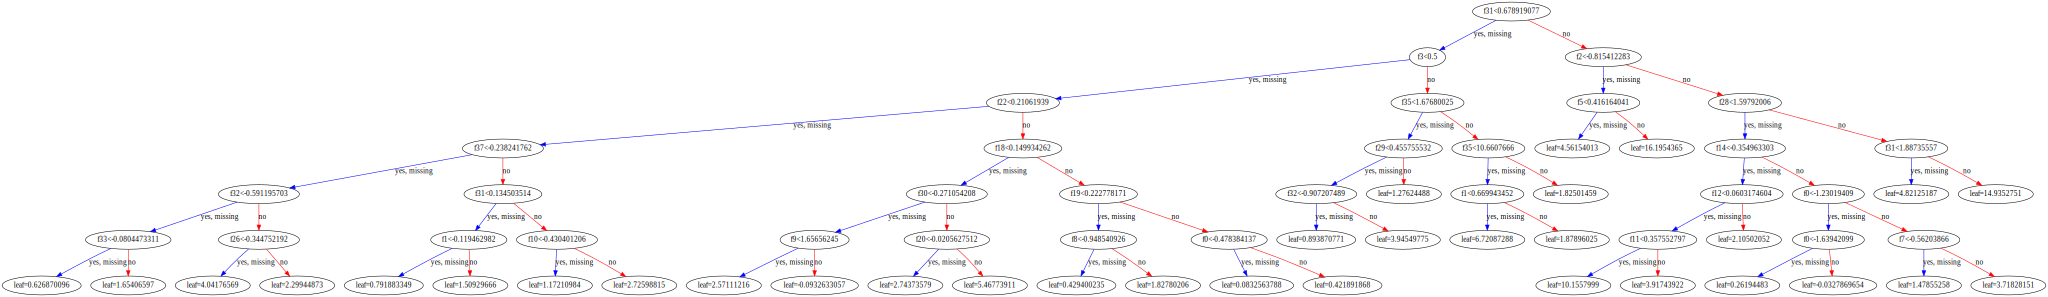

In [ ]:
xgb.to_graphviz(model_xgb, num_trees=1)

## Additional Step

We are trying to address:
* Is there a difference in homelessness rates based on the type of district like in urban or suburban areas?

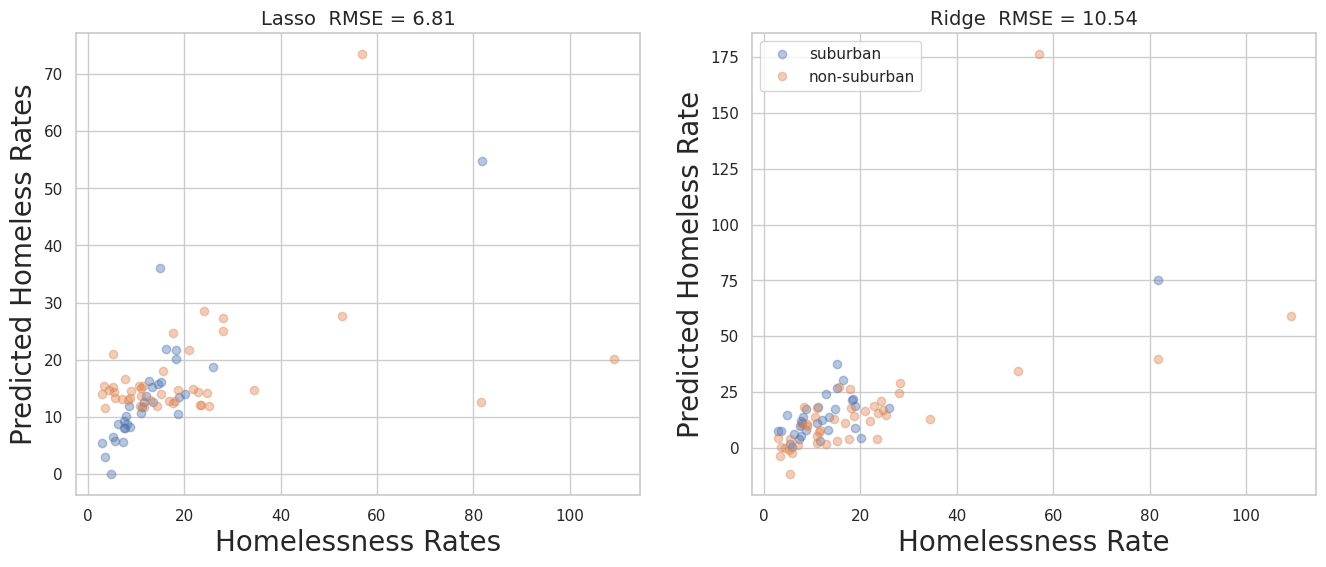

In [ ]:
# Selecting data for suburban areas 
X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['suburban'] == 1]
y = df['rate_homeless'].loc[df['suburban'] == 1]

# Train test splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)

# Scaling the data 
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fitting the model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')

# Computing MSE, RMSE, and R^2
MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))

# Creating array of alpha values 
alphas = 10**np.linspace(-4,2,10)

# Initializing and fitting Lasso Regression method 
lasso = Lasso(max_iter = 100000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

# Computing MSE, RMSE, and R^2 for Lasso model 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))

plt.figure(figsize=(16,6))

# Plotting Lasso predictions 
plt.subplot(1,2,1)
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "suburban")
plt.xlabel('Homelessness Rates',fontsize = 20)
plt.ylabel('Predicted Homeless Rates',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14)

# Plotting Ridge predictions 
plt.subplot(1,2,2)
plt.plot(y_test, ridge_reg.predict(X_test),'o', alpha = 0.4, label = "suburban")
plt.xlabel('Homelessness Rate',fontsize = 20)
plt.ylabel('Predicted Homeless Rate',fontsize = 20)
plt.title('Ridge' + ' ' + ' RMSE = ' + str(RMSE_ridge.round(2)),fontsize = 14);

X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['suburban'] == 0]
y = df['rate_homeless'].loc[df['suburban'] == 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []

lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))

#Lasso 
plt.subplot(1,2,1) # first subplot 
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "non-suburban")

# Ridge 
plt.subplot(1,2,2) # second subplot
plt.plot(y_test, ridge_reg.predict(X_test),'o', alpha = 0.4, label = "non-suburban")

plt.subplots_adjust(hspace = 0.5) 

plt.legend(loc="upper left") # adding legend 
plt.show()



Suburban and non-suburban homelessness rates plot points appear to cluster together in the range of 0-30. This clustering suggests that there may be similarities in the factors influencing homelessness rates across both suburban and non-suburban areas within this specific range. 

The majority of non-suburban plot points seem to be outliers with high homelessness rates with mostly low predicted homelessness rates. The majority of non-suburban plot points appear as outliers, characterized by high homelessness rates, while the corresponding predicted homelessness rates are predominantly low. This discrepancy suggests that the model may struggle to accurately capture the complexities and unique factors influencing homelessness in non-suburban areas. 

## Conclusion

In conclusion, the Lasso, Ridge, and XG Boost models demonstrated similar performance with some variability in their effectiveness. This is evident from our k-fold cross-validation, where the mean RMSE across the three models was approximately 10.5. This indicates that, on average, the models predicted the homelessness rates with an error of around 10.5 percentage points.

Although there is room for improvement, the best-performing models were able to achieve an accuracy of approximately 5 percentage points. However, it is important to note that the majority of non-suburban plot points appeared as outliers, exhibiting high homelessness rates with low predicted rates. This suggests that the models may face challenges in accurately capturing the unique dynamics and factors influencing homelessness in non-suburban areas.

Considering the overall similarity in performance among the models, the choice between them would depend on additional factors such as the data set maybe needing to be larger for better accuracy.